# Zomato Restaurant Data Analysis
This notebook covers data preprocessing, exploratory data analysis, visual insights, and model building using the Zomato dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data_path = r"C:\Users\resha\Downloads\zomato.csv"
df = pd.read_csv(data_path)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
# Handle missing values
df.dropna(subset=['Cuisines'], inplace=True)

# Convert 'Has Table booking', 'Has Online delivery', 'Is delivering now' to binary
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Drop irrelevant or redundant columns
df.drop(columns=['Switch to order menu', 'Address', 'Locality Verbose'], inplace=True)

# Convert category types
df['Price range'] = df['Price range'].astype('category')
df['Rating text'] = df['Rating text'].astype('category')

## Exploratory Data Analysis (EDA)

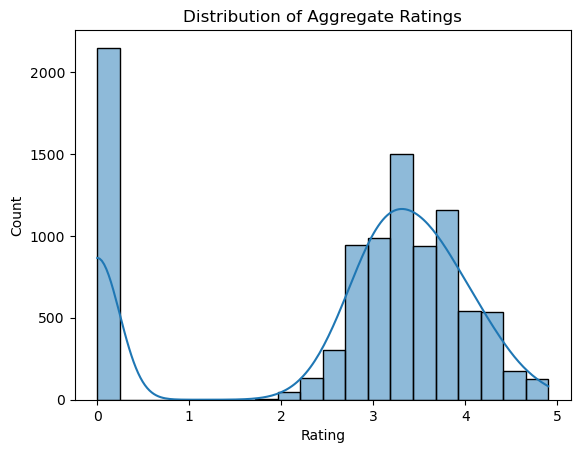

In [13]:
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

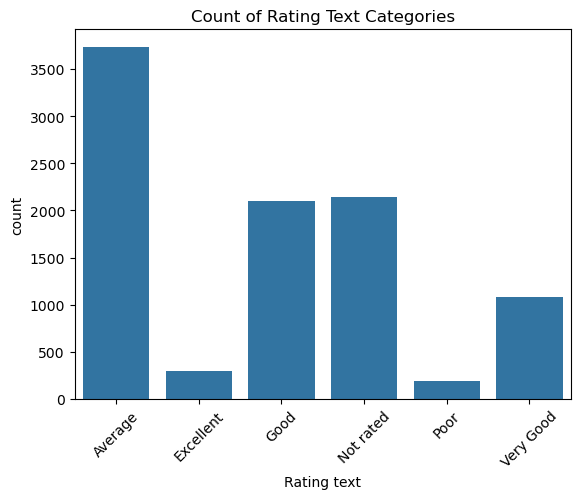

In [14]:
sns.countplot(x='Rating text', data=df)
plt.title('Count of Rating Text Categories')
plt.xticks(rotation=45)
plt.show()

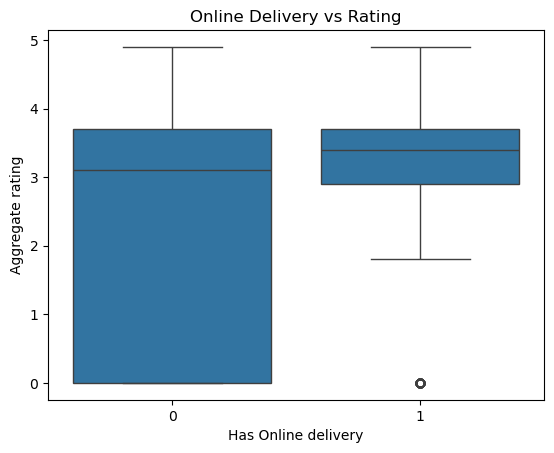

In [15]:
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title('Online Delivery vs Rating')
plt.show()

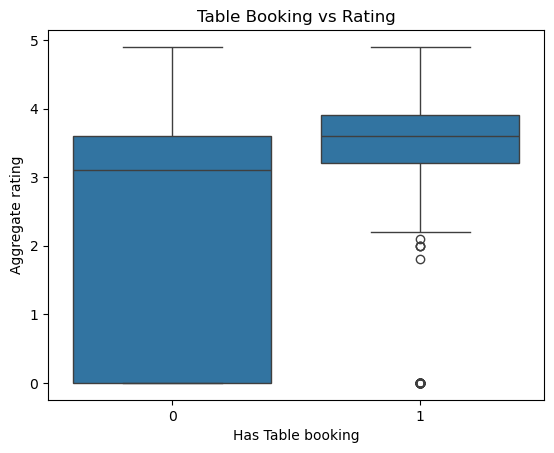

In [16]:
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Table Booking vs Rating')
plt.show()

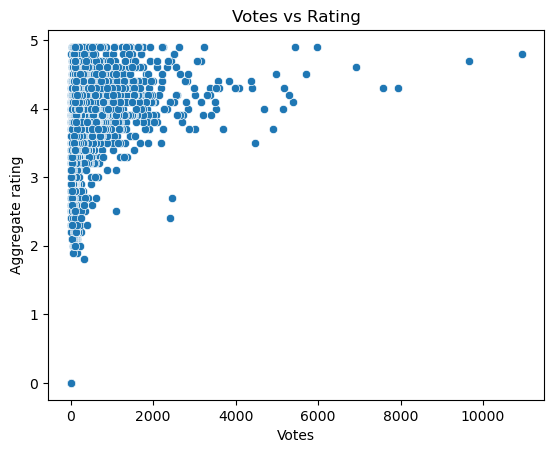

In [17]:
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Rating')
plt.show()

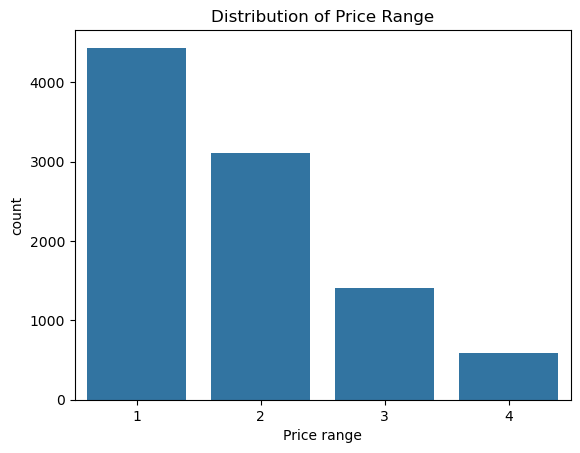

In [18]:
sns.countplot(x='Price range', data=df)
plt.title('Distribution of Price Range')
plt.show()

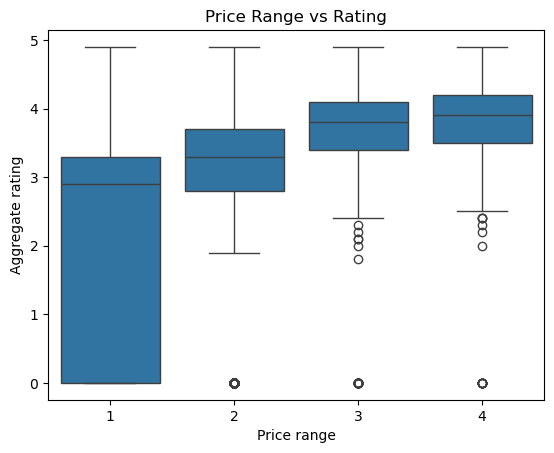

In [19]:
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs Rating')
plt.show()

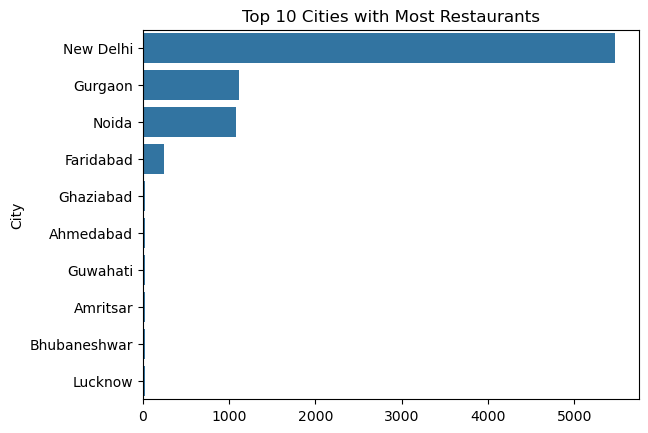

In [20]:
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities with Most Restaurants')
plt.show()

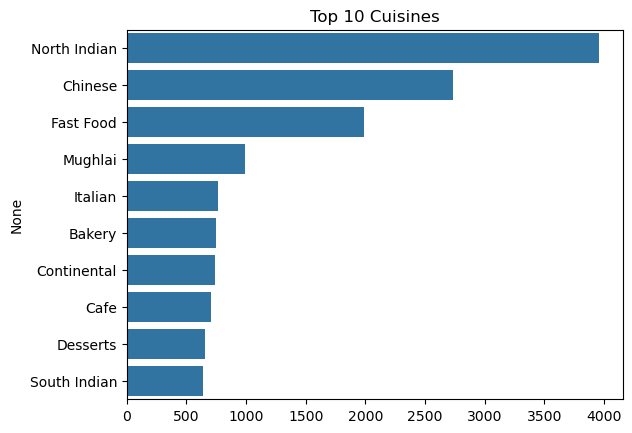

In [21]:
from collections import Counter
cuisine_list = df['Cuisines'].dropna().str.split(', ')
cuisine_flat = [item for sublist in cuisine_list for item in sublist]
top_cuisines = pd.Series(Counter(cuisine_flat)).nlargest(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.show()

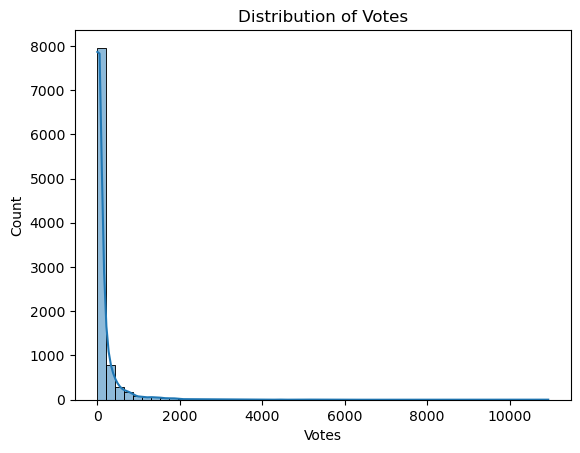

In [22]:
sns.histplot(df['Votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.show()

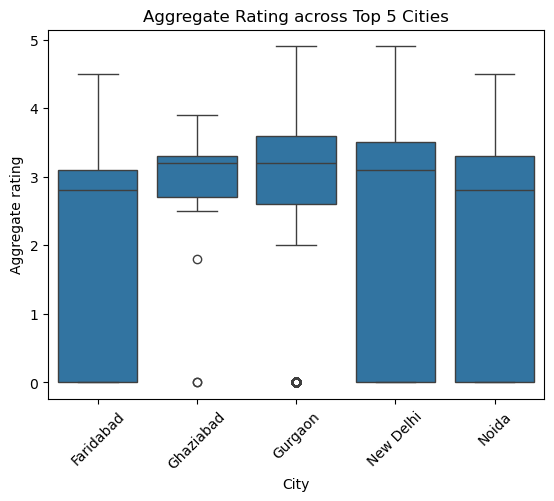

In [23]:
top_cities_names = df['City'].value_counts().nlargest(5).index
sns.boxplot(x='City', y='Aggregate rating', data=df[df['City'].isin(top_cities_names)])
plt.title('Aggregate Rating across Top 5 Cities')
plt.xticks(rotation=45)
plt.show()

C:\Users\resha\AppData\Local\Temp\ipykernel_15564\443517438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=df, palette='Set2')


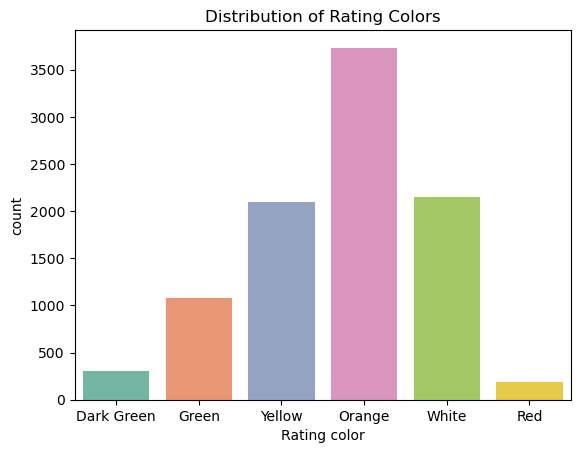

In [24]:
sns.countplot(x='Rating color', data=df, palette='Set2')
plt.title('Distribution of Rating Colors')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
features = df[['Has Table booking', 'Has Online delivery', 'Price range', 'Votes']]
target = df['Rating text'].cat.codes  # Encode labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(round(accuracy_score(y_test,y_pred) * 100,2),'% ')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

67.37 % 
[[616   3  93   0   9  25]
 [  5  14  14   0   0  26]
 [159  19 168   0   6  65]
 [  0   0   0 433   0   0]
 [ 26   1  16   0   0   1]
 [ 37  29  87   0   2  55]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       746
           1       0.21      0.24      0.22        59
           2       0.44      0.40      0.42       417
           3       1.00      1.00      1.00       433
           4       0.00      0.00      0.00        44
           5       0.32      0.26      0.29       210

    accuracy                           0.67      1909
   macro avg       0.45      0.45      0.45      1909
weighted avg       0.65      0.67      0.66      1909

